## 이번 챕터 내용
* 순열, 조합
* 빈도계산
* 덱
* 우선순위 큐

---

# 1. 순열, 조합

## 1-1. 순수한 방법
 * nC2 는 가능
 * nC3 nC4 등은 for문으로 한계가 있음

In [15]:
''' nC2 구하기 '''
N = 5
cnt = 0
for i in range(N-1): 
    for j in range(i+1, N): 
        print(i, j)
        cnt += 1
print("5C2 = ", cnt)

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4
5C2 =  10


## 1-2. 조합 combinations (중복 없이 출력)

In [7]:
from itertools import combinations          # 조합

In [16]:
# 4C3 출력
print(list(combinations([1, 2, 3, 4], 3)))

#                첫 번째 인자 = 리스트, 두 번째 인자 = nCm일 경우, m

print("* 4C3 = ", len(list(combinations([1,2,3,4], 3))))

[(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]
* 4C3 =  4


In [14]:
# 5C2
print(list(combinations([0,1,2,3,4], 2)))

print("* 5C2 = ", len(list(combinations([0,1,2,3,4], 2))))

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
* 5C2 =  10


In [52]:
''' 백준 15650 - 내가 푼(블로그 참고) '''
from itertools import combinations    # iter tools의 조합(콤비네이션s)

n, m = map(int, input().split())

# 리스트를 따로 만들지 않고 한줄에 해줬으며, (중요) 이때 각 원소를 str()로 변환해줘야 함
result = list(combinations([str(i) for i in range(1, n+1)], m)) 

for i in result:
    print(" ".join(i))

#                첫 번째 인자 = 리스트, 두 번째 인자 = nCm일 경우, m

4 2
1 2
1 3
1 4
2 3
2 4
3 4


## 1-3. 순열 permutations (중복 포함 모든 경우의 수 출력)

In [53]:
''' 백준 15649 - 내가 푼(블로그 참고) '''
from itertools import permutations     # iter tools의 순열 (<--> 조합 combinations)

n, m = map(int, input().split())

# 리스트를 따로 만들지 않고 한줄에 해줬으며, (중요) 이때 각 원소를 str()로 변환해줘야 함
result = list(permutations([str(i) for i in range(1, n+1)], m)) 

for i in result:
    print(" ".join(i))

#                첫 번째 인자 = 리스트, 두 번째 인자 = nCm일 경우, m

4 2
1 2
1 3
1 4
2 1
2 3
2 4
3 1
3 2
3 4
4 1
4 2
4 3


## 1-4. 순열과 조합 참고 팁

In [ ]:
''' 중복 조합 '''
from itertools import combinations_with_replacement

''' 중복 순열 '''
from itertools import product

---
# 2. 빈도계산
* (중요) 대부분 기업 코딩테스트에서 모르면 조금 고생하는 내용
* .count말고, __"collections의 Counter함수" 활용__

In [1]:
from collections import Counter

In [17]:
''' 백준 2592 '''

''' 안썼을 경우 - 내가 품 '''
result = []
arr = [0]*100   # 10의 배수니까 1000개까지 필요없고, 100개만 만들어줬음(메모리 때문)

for i in range(10):
    result.append(int(input()))
    arr[result[i]//10] += 1      # 1000개 만들고 arr[result[i]] 로 해줘도 됨
    
print(sum(result)//10)
print(arr.index(max(arr))*10)    # 인덱스값으로 가져옴


''' 썼을 경우 - 블로그 참고 '''
from collections import Counter

result = [int(input()) for _ in range(10)]   # (중요)

print(sum(result)//10)

a = Counter(result).most_common()
print(a[0][0])                       # a를 출력하면 튜플형태로 출력됨

10
40
30
60
30
20
60
30
40
50
37
30


In [18]:
print(a)

[(30, 3), (40, 2), (60, 2), (10, 1), (20, 1), (50, 1)]


In [15]:
''' 백준 1157 _ 내가 품 '''

from collections import Counter

arr = input()

arr = arr.upper()                    # (중요) 결국 대문자만 사용하기 때문에 .upper() 사용함

result = Counter(arr).most_common()  # 블로그로 공부한 Counter().most_common()를 활용

if len(result) == 1:                 # 단일 문자의 경우
    print(result[0][0])
elif result[0][1] == result[1][1]:   # 여러 개일 경우 = 2개 이상인 경우 = 맨 앞에만 체크하면 됨
    print('?')
else:                                 # 나머지의 경우, 맨 앞에 데이터만 출력하면 됨
    print(result[0][0])

baaa
A


# 3. 힙(Heap)

## 3-1. 최소힙, 최대힙
 * heap q : 기본적으로 최소힙이며, 최솟값은 0번 인덱스에 저장됨
     - 최솟값 0은 이진트리 root에 위치함
 * heapq.heappush()
 * heapq.heappop()
 

In [20]:
import heapq

heap = []                # 리스트이자 힙 생성 => 출력시 이진트리로 출력

heapq.heappush(heap, 3)
heapq.heappush(heap, 1)
heapq.heappush(heap,10)
heapq.heappush(heap, 5)
heapq.heappush(heap, 8)

print(heap)              # 0번째 인덱스 = 가장 작은 값 = root node
print(heapq)
print("length = ", len(heap))

print(heapq.heappop(heap))    # pop 수행!
print(heap)

[1, 3, 10, 5, 8]
<module 'heapq' from 'C:\\Users\\Tae\\anaconda3\\lib\\heapq.py'>
length =  5
1
[3, 5, 10, 8]


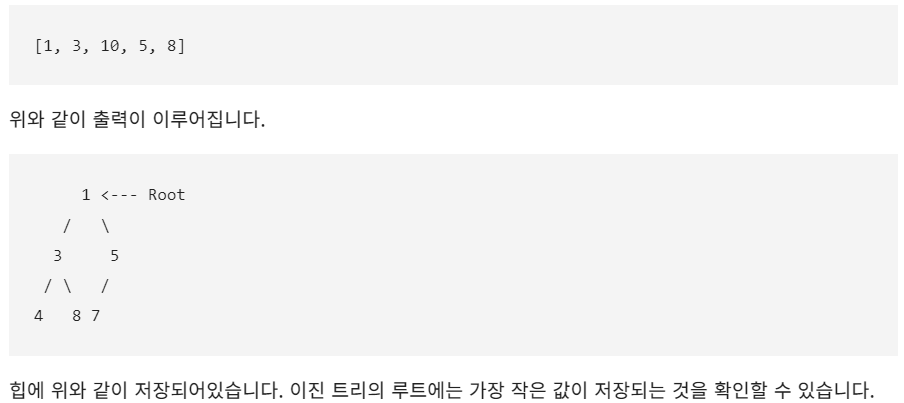


In [23]:
''' 백준 11279 '''



' 백준 11279 '